# 1.13 Exercise

理論上はlow stateにいる割合が2/3に収束していく

In [32]:
import numpy as np

P = [[0.8, 0.2],[0.1, 0.9]]
P = np.array(P)

for i in range(20):
    P = P.dot(P)
P

array([[ 0.33333333,  0.66666667],
       [ 0.33333333,  0.66666667]])

ループ回数が多いと発散する．浮動小数点の問題？

In [3]:
import numpy as np

P = [[0.8, 0.2],[0.1, 0.9]]
P = np.array(P)
P

for i in range(100):
    P = P.dot(P)
P

array([[ inf,  inf],
       [ inf,  inf]])

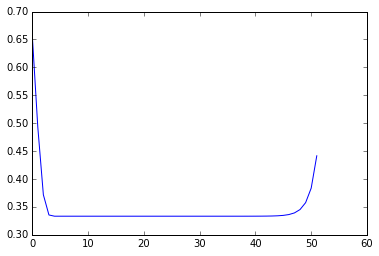

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 52

P = np.array([[0.8, 0.2], [0.1, 0.9]])
p = np.empty(n)
p[0] = P[0][0]

for i in range(n):
    P = P.dot(P)
    p[i] = P[0][0]
    
fig, ax = plt.subplots()
x = [i for i in range(n)]
plt.plot(x, p)
plt.show()


In [24]:
from random import uniform

def marcov_python(n, init_state):
    x = np.empty(n)
    x[0] = init_state
    for t in range(1, n):
        U = uniform(0,1)
        if x[t-1] == 1: # high state
            if U < 0.2: # with prob 0.2
                x[t] = 0 # move to low state
            else: # with prob 0.8
                x[t] = 1 # stay in high state
        else: # low state
            if U < 0.1: # wi
    th prob 0.1
                x[t] = 1 # move to high state
            else: # with prob 0.9
                x[t] = 0
    return x

In [31]:
%%timeit
x = marcov_python(100000, 0)
1-np.mean(x)

10 loops, best of 3: 90.9 ms per loop


In [29]:
from numba import jit

marcov_numba = jit(marcov_python)

In [30]:
%%timeit
x = marcov_numba(100000, 0)
1-np.mean(x)

The slowest run took 97.53 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.28 ms per loop
